Tous les corrigés se trouvent (ou se trouveront) ici : https://curiousml.github.io/

# TD/TP 3 : 

# TD :

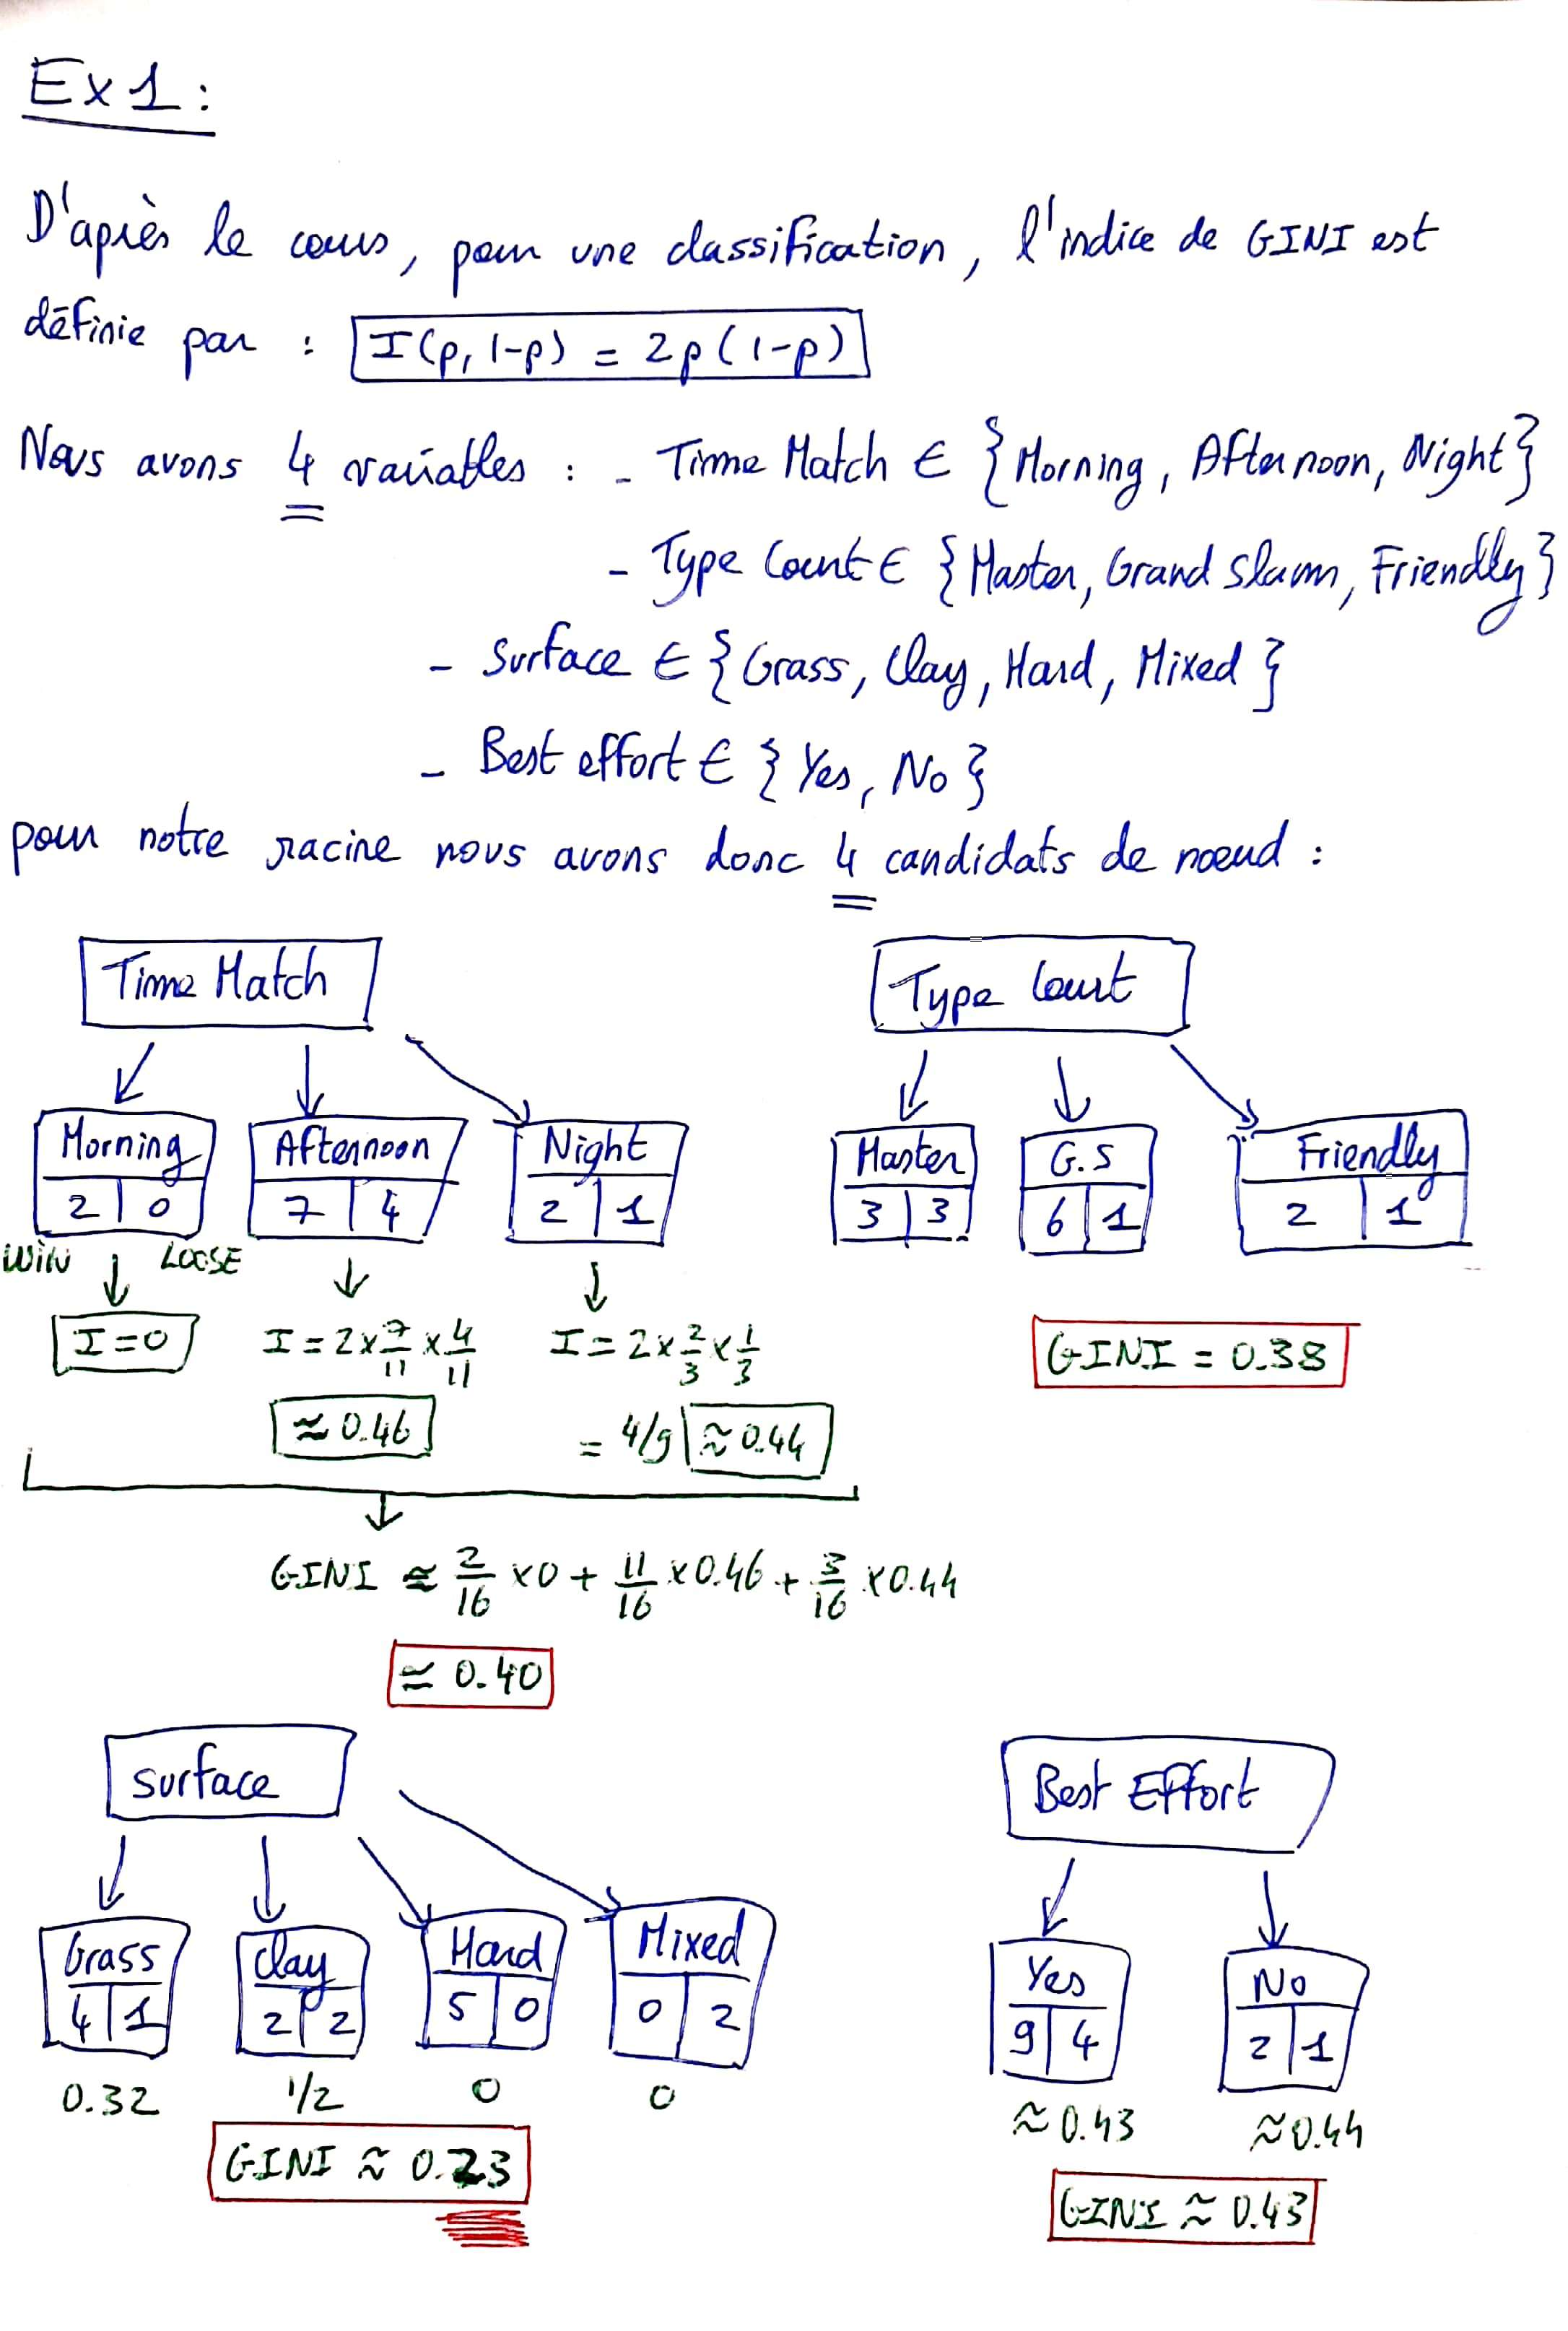

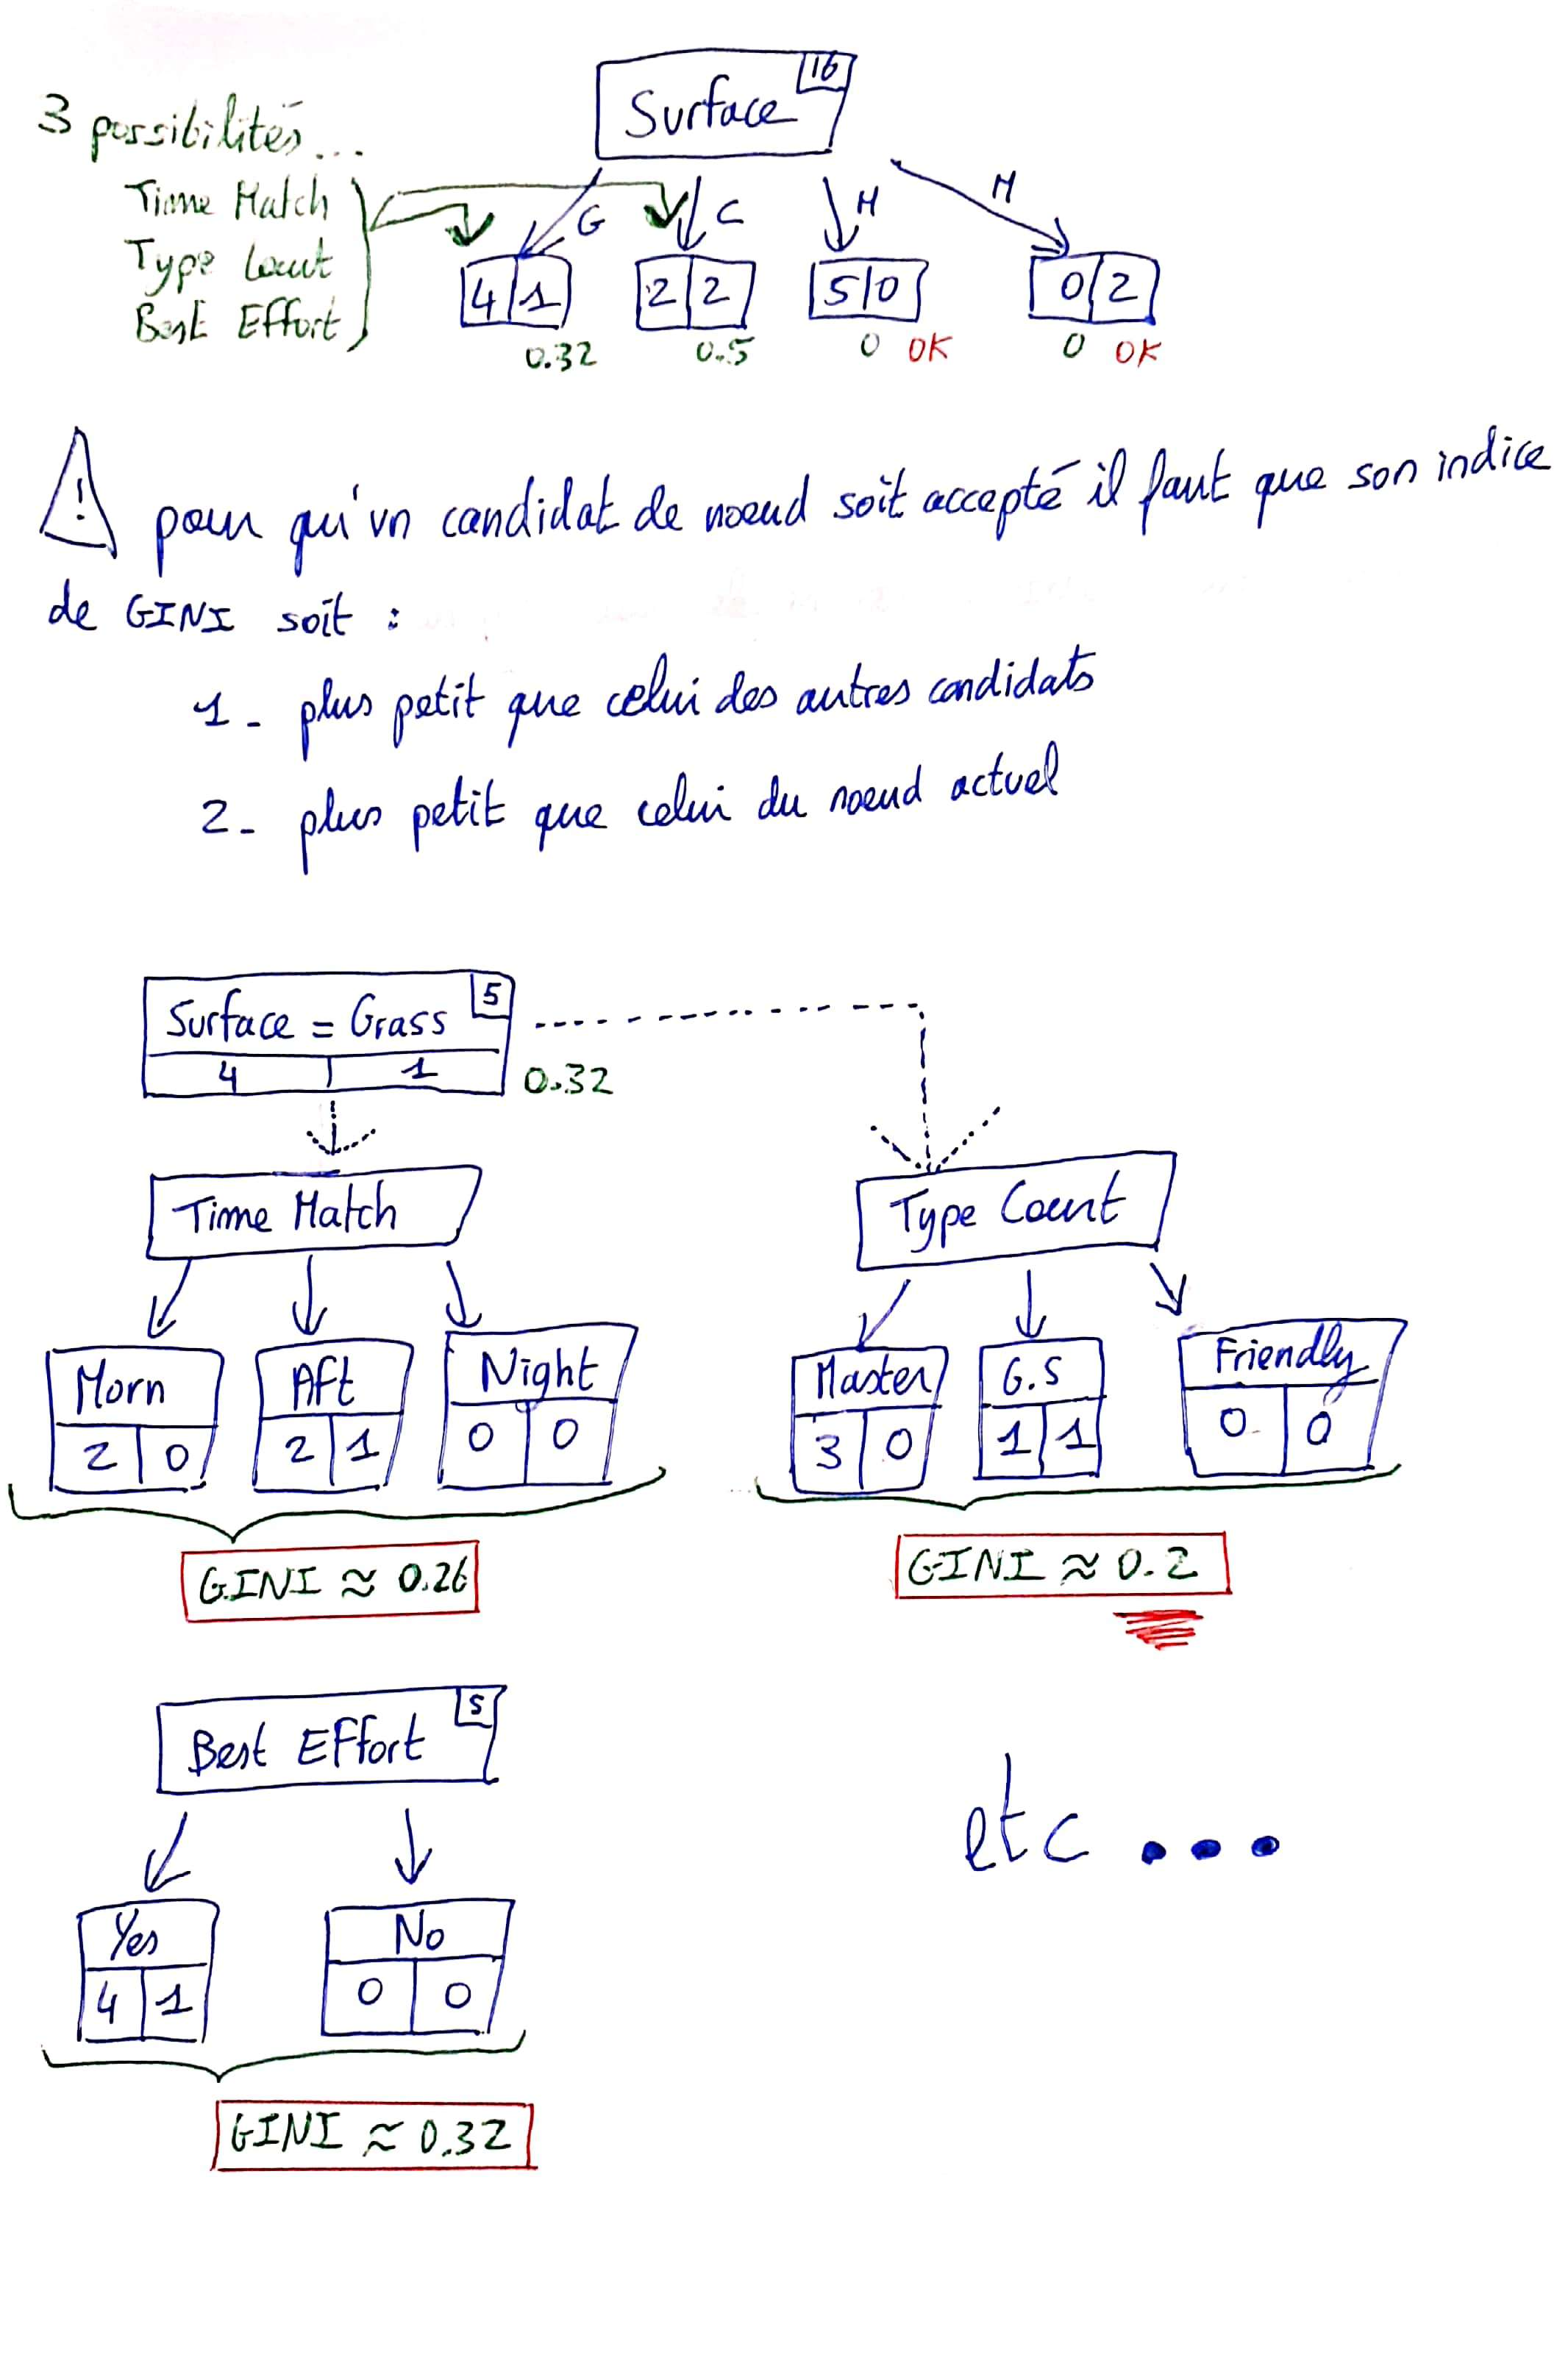

- ci-dessous la solution complète (graphique généré à l'aide du package **p_decision_tree**)

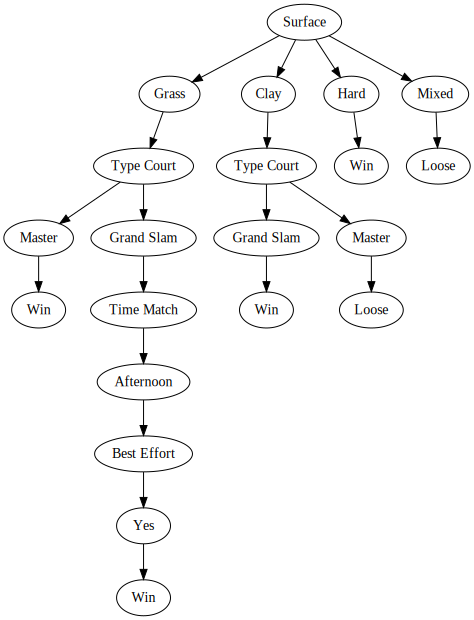

In [181]:
import numpy as np
from p_decision_tree.DecisionTree import DecisionTree
import pandas as pd

data_dict = {'Time Match' : ["Morning", "Afternoon", "Night", "Afternoon", "Afternoon", "Afternoon", "Afternoon", "Night", "Afternoon", "Afternoon", "Afternoon", "Afternoon", "Morning", "Afternoon", "Night", "Afternoon"],
'Type Court' : ["Master", "Grand Slam", "Friendly", "Friendly", "Master", "Grand Slam", "Grand Slam", "Master", "Master", "Grand Slam", "Master", "Grand Slam", "Master", "Grand Slam", "Friendly", "Grand Slam"],
'Surface' : ["Grass", "Clay", "Hard", "Mixed", "Clay", "Grass", "Hard", "Mixed", "Grass", "Hard", "Clay", "Hard", "Grass", "Grass", "Hard", "Clay"],
'Best Effort' : ["Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes"],
'Y' : ["Win", "Win", "Win", "Loose", "Loose", "Win", "Win", "Loose", "Win", "Win", "Loose", "Win", "Win", "Loose", "Win", "Win"]}

data_df = pd.DataFrame(data_dict)
Y = data_df["Y"]
X = data_df[["Time Match", "Type Court", "Surface", "Best Effort"]]

decisionTree = DecisionTree(np.array(X).tolist(),
                            ["Time Match", "Type Court", "Surface", "Best Effort"],
                            np.array(Y).tolist(),
                            "gini")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,0)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

#When using Jupyter
display( dot )

# TP : 

## Partie 1 : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### Q1.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # test train spit à 75% - 25%

### Q2.

In [5]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=1).fit(X_train, y_train)
print('Score: ', svm.score(X_test,y_test))

Score:  0.6503496503496503


/Users/Faugon/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- varions tout d'abord $C$ entre 0.01 et 1 et voyons ce qu'il se passe

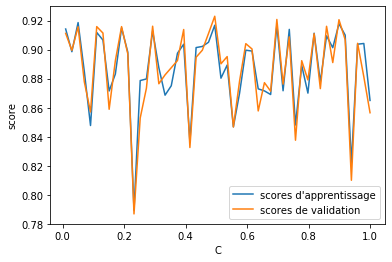

In [6]:
from sklearn.model_selection import validation_curve
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning # afin d'ignorer le warning ci-dessus
simplefilter("ignore", category=ConvergenceWarning) # afin d'ignorer le warning de convergence ci-dessus

C_range = np.linspace(0.01,1,50)
train_scores, valid_scores = validation_curve(LinearSVC(), X_train, y_train, "C", C_range, cv=10)

train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

plt.plot(C_range,train_scores_mean,label="scores d'apprentissage")
plt.plot(C_range,valid_scores_mean,label="scores de validation")
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

Remarque : le modèle est instable pour C entre 0.01 et 1. Penalisons encore plus !

Le graphique ci-après montre qu'en prenant C relativement petit, le modèle est plus stable et plus performant

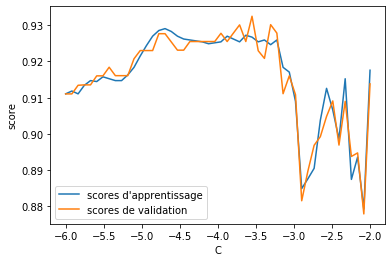

In [7]:
C_range = np.logspace(-6,-2,50)
train_scores, valid_scores = validation_curve(LinearSVC(), X_train, y_train, "C", C_range, cv=10)

train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

plt.plot(np.log10(C_range),train_scores_mean,label="scores d'apprentissage")
plt.plot(np.log10(C_range),valid_scores_mean,label="scores de validation")
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

Après avoir bien paramétré notre hyperparamètre $C$, nous observons une nette améliortation du score !

In [8]:
C_best = C_range[np.argmax(valid_scores_mean)]
svm = LinearSVC(C=C_best).fit(X_train,y_train)

print('Score:', svm.score(X_test,y_test))
y_test_predict = svm.predict(X_test)

Score: 0.9370629370629371


 pour plus d'information sur le paramètre C : https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

### Q3.

- matrice de confusion

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test,y_test_predict)
print(confusion_matrix_test)

[[42  8]
 [ 1 92]]


- les métriques recall et precision (avec la **matrice de confusion**) :

In [10]:
tp = confusion_matrix_test[0,0]
fp = confusion_matrix_test[1,0]
fn = confusion_matrix_test[0,1]
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print('Recall :', recall)
print('Precision :', precision)

Recall : 0.84
Precision : 0.9767441860465116


- les métriques recall et precision (avec **package**) :

In [11]:
from sklearn.metrics import recall_score, precision_score
print('Recall: ',recall_score(y_test,y_test_predict,pos_label=0))
print('Precision: ',precision_score(y_test,y_test_predict,pos_label=0))

Recall:  0.84
Precision:  0.9767441860465116


### Q4.

In [12]:
def false_positive_rate(y_true,y_predict,pos_label):
    return np.sum(y_true[y_predict == pos_label] != pos_label)/np.sum(y_true != pos_label)

In [13]:
print(false_positive_rate(y_test,y_test_predict,0))

0.010752688172043012


### Q5.

In [14]:
def modified_predictor(X,tau):
    return (svm.decision_function(X) >= tau).astype('int')

### Q6.

- Un très **mauvais** prédicteur a un rappel (taux de vrais positifs) à peine plus élevé que le taux de faux positifs : la courbe ROC n'est donc que légèrement au-dessus de la diagonale (courbe de coordonnées  $(t,t)$  pour  $t\in [0,1]$ ) 
- Pour un **bon** prédicteur en revanche, la courbe ROC passe nettement au-dessus de la diagonale.

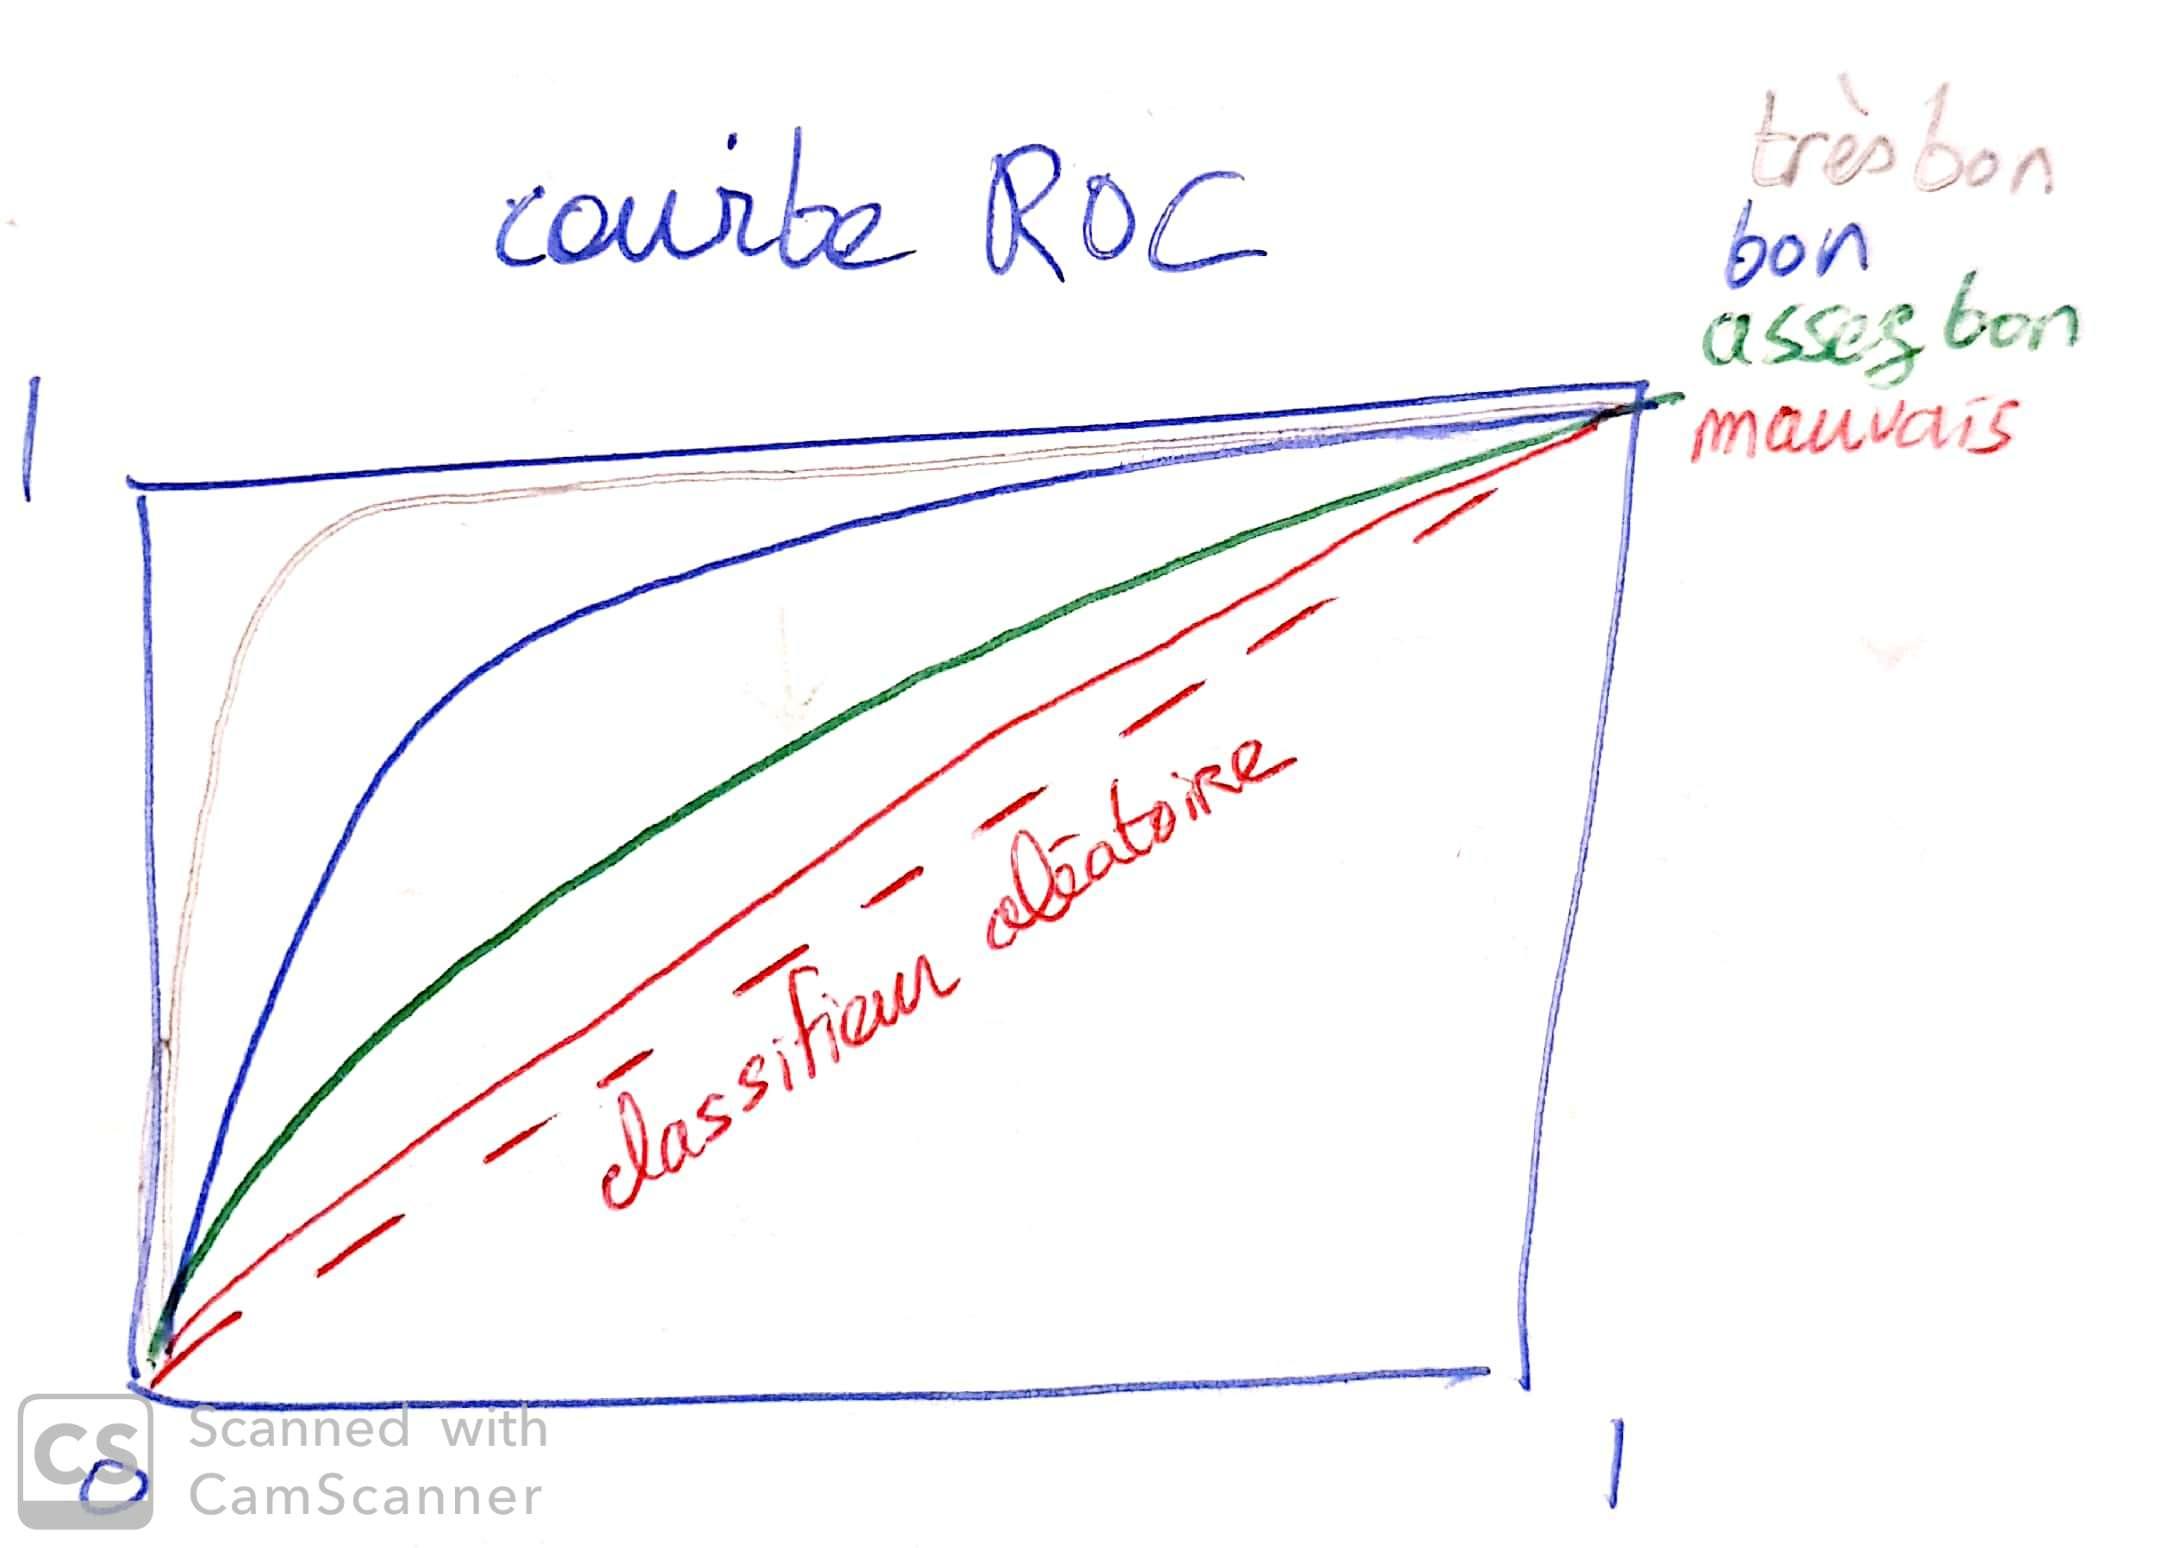

### Q7.

- courbe ROC :

In [15]:
decision_function_train = svm.decision_function(X_train)
tau_range = np.linspace(np.min(decision_function_train),np.max(decision_function_train),100)

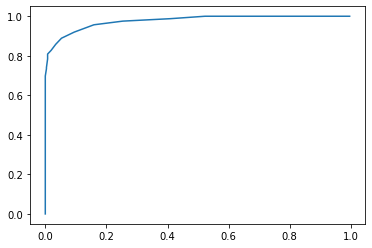

In [16]:
recalls = []
fprs = []
for tau in tau_range:
    y_train_predict = modified_predictor(X_train,tau)
    recalls.append(recall_score(y_train,y_train_predict,pos_label=0))
    fprs.append(false_positive_rate(y_train,y_train_predict,0))

plt.plot(fprs,recalls)
plt.show()

### Q8.

In [17]:
recalls_array = np.array(recalls)
fprs_array = np.array(fprs)

good_enough_recalls_index = (recalls_array >= .95)
tau_best = (tau_range[good_enough_recalls_index])[np.argmin(fprs_array[good_enough_recalls_index])]

y_test_predict = modified_predictor(X_test,tau_best)

from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_test_predict))
print('Recall: ', recall_score(y_test, y_test_predict,pos_label=0))
print('Precision: ', precision_score(y_test, y_test_predict,pos_label=0))
print('False positive rate: ', false_positive_rate(y_test, y_test_predict,pos_label=0))

Accuracy score:  0.8671328671328671
Recall:  0.96
Precision:  0.7384615384615385
False positive rate:  0.1827956989247312


l'accuracy est plus faible que le svm précédent mais nous avons un meilleur rappel (Recall à 0.96) !

## Partie 2 : 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

### Q9.

In [20]:
def tree_summary(dt):
    print("Score d'apprentissage:",dt.score(X_train,y_train))
    print("Score de test:",dt.score(X_test,y_test))
    print("Profondeur de l'arbre:",dt.tree_.max_depth)
    print("Nombre de noeuds:",dt.tree_.node_count)

In [21]:
tree_summary(dt)

Score d'apprentissage: 1.0
Score de test: 0.791457769006894
Profondeur de l'arbre: 17
Nombre de noeuds: 709


L'arbre est profond avec un grand nombre de noeuds. Le surapprentissage est important car le score d'apprentissage est carrément égal à 1 tandis que le score de test est nettement inférieur.

### Q10.

In [22]:
dt2 = DecisionTreeRegressor(random_state=0,max_depth=3).fit(X_train,y_train)
tree_summary(dt2)

Score d'apprentissage: 0.8160045697821083
Score de test: 0.7311557939115028
Profondeur de l'arbre: 3
Nombre de noeuds: 15


On obtient comme prévu un arbre de pronfondeur 3. Le nombre de noeuds est bien moindre que dans l'arbre précédent. Le score de test est légèrement moins bon, mais le sur-apprentissage est bien moins prononcé.

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

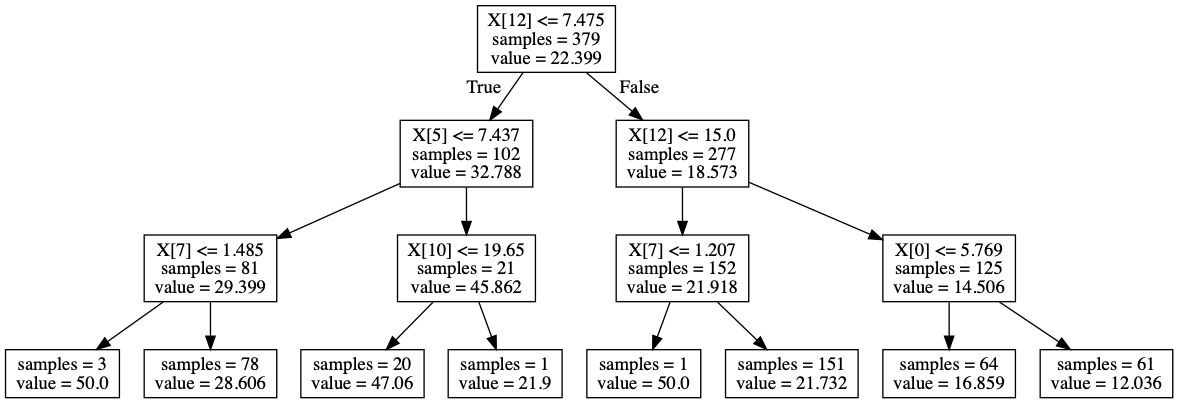

In [25]:
foo = StringIO()
export_graphviz(dt2,out_file=foo,impurity=False)
graph = graph_from_dot_data(foo.getvalue())  
Image(graph.create_png())

### Q11.

Les variables explicatives intervenant dans l'arbre sont X_12, X_5, X_7, X_10 et X_0, qui correspondent respectivement à LSTAT, RM, DIS, PTRATIO et CRIM.

### Q12.

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[4,5,6,7,8]}
predictor= GridSearchCV(DecisionTreeRegressor(random_state=0),cv=10,param_grid=param_grid)
predictor.fit(X_train,y_train)
print('Paramètre sélectionné:',predictor.best_params_)
print('Score d\'apprentissage: ',predictor.score(X_train,y_train))
print('Score de test: ',predictor.score(X_test,y_test))

Paramètre sélectionné: {'max_depth': 6}
Score d'apprentissage:  0.9492494537851387
Score de test:  0.8564480113817428


### Q13.

In [27]:
def r2_score(y_true,y_predict):
    return 1-np.sum((y_true-y_predict)**2)/np.sum((y_true-np.mean(y_true))**2)

### Q14.

In [32]:
from sklearn.utils import resample

X_train_,y_train_ = resample(X_train,y_train)
dt_ = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_)
print('Score de test:',r2_score(y_test,dt_.predict(X_test)))

Score de test: 0.7945060352559934


### Q15.

In [33]:
dts_predictions = np.zeros((5,y_test.size))
for n in range(0,5):
    X_train_,y_train_ = resample(X_train,y_train)
    dts_predictions[n,:] = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_).predict(X_test)
    print('Score de test:',r2_score(y_test,dts_predictions[n,:]))
    print()

Score de test: 0.7951061436348136

Score de test: 0.7616686327811006

Score de test: 0.8000938464381369

Score de test: 0.7492288227152386

Score de test: 0.7338798578180408



### Q16.

In [35]:
dts_aggregated_predictions = np.mean(dts_predictions,axis=0)
print("Score R² du prédicteur agrégé:",r2_score(y_test,dts_aggregated_predictions))

Score R² du prédicteur agrégé: 0.8947173921845336


### Q17.

In [36]:
def tree_aggregation(n_trees):
    dts_predictions = np.zeros((n_trees,y_test.size))
    for n in range(0,n_trees):
        X_train_,y_train_ = resample(X_train,y_train)
        dts_predictions[n,:] = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_).predict(X_test)
    dts_aggregated_predictions = np.mean(dts_predictions,axis=0)
    print("Score de test:",r2_score(y_test,dts_aggregated_predictions))

In [37]:
tree_aggregation(1000)

Score de test: 0.9065650204178203


### Q18.

In [38]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor(n_estimators=1000).fit(X_train,y_train).score(X_test,y_test)

0.9084762783073775

Notre procédure et celle scikit-learn donnent des résultats très similaires.